In [1]:
import pandas as pd
db = pd.read_csv("titanic-passengers.csv",sep=';')
db['Age'].fillna(db['Age'].mean(),inplace=True)
number_of_elements_cabin=len(db["Cabin"])
print("Number of elements cabin:", number_of_elements_cabin)
#number of elements by category cabin
db["Cabin"].value_counts()
#replace and display the values
db["Cabin"].fillna('G6',inplace=True)
number_of_elements_Embarked=len(db["Embarked"])
print("Number of elements Embarked:", number_of_elements_Embarked)
#number of elements by category Embarked
db["Embarked"].value_counts().index[0]
#replace and display the values
db["Embarked"].fillna('S',inplace=True)
db.isnull().sum()


Number of elements cabin: 891
Number of elements Embarked: 891


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [2]:
db

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,G6,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,G6,C
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,G6,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,G6,S


In [3]:
#preparing data for logistic regression
db["Survived"]=db["Survived"].map({"Yes": 1, "No": 0})   #convert admitted variable into numerical
db["Sex"]=db["Sex"].map({"male": 1, "female": 2})   #convert admitted variable into numerical
db["Embarked"]=db["Embarked"].map({"S": 0, "C": 1, "Q": 2})
db['Title'] = db.Name.map( lambda x: x.split(', ')[1].split('.')[0])
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"}
cleanup={"Title":Title_Dictionary}
db.replace(cleanup,inplace=True)
db["Title"]=db["Title"].map({"Officer": 1, "Royalty": 2, "Miss": 3, "Mrs": 4, "Master": 5})
db["FamilySize"] = db["SibSp"] + db["Parch"]
db['Age'] = db['Age'].astype(int)
db

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28,0,0,248740,13.0000,G6,0,4,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25,0,0,348123,7.6500,F G73,0,4,0
2,641,0,3,"Jensen, Mr. Hans Peder",1,20,0,0,350050,7.8542,G6,0,4,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",2,29,0,4,349909,21.0750,G6,0,4,4
4,672,0,1,"Davidson, Mr. Thornton",1,31,1,0,F.C. 12750,52.0000,B71,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14,1,0,237736,30.0708,G6,1,4,1
887,61,0,3,"Sirayanian, Mr. Orsen",1,22,0,0,2669,7.2292,G6,1,4,0
888,535,0,3,"Cacic, Miss. Marija",2,30,0,0,315084,8.6625,G6,0,3,0
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29,0,0,349215,7.8958,G6,0,4,0


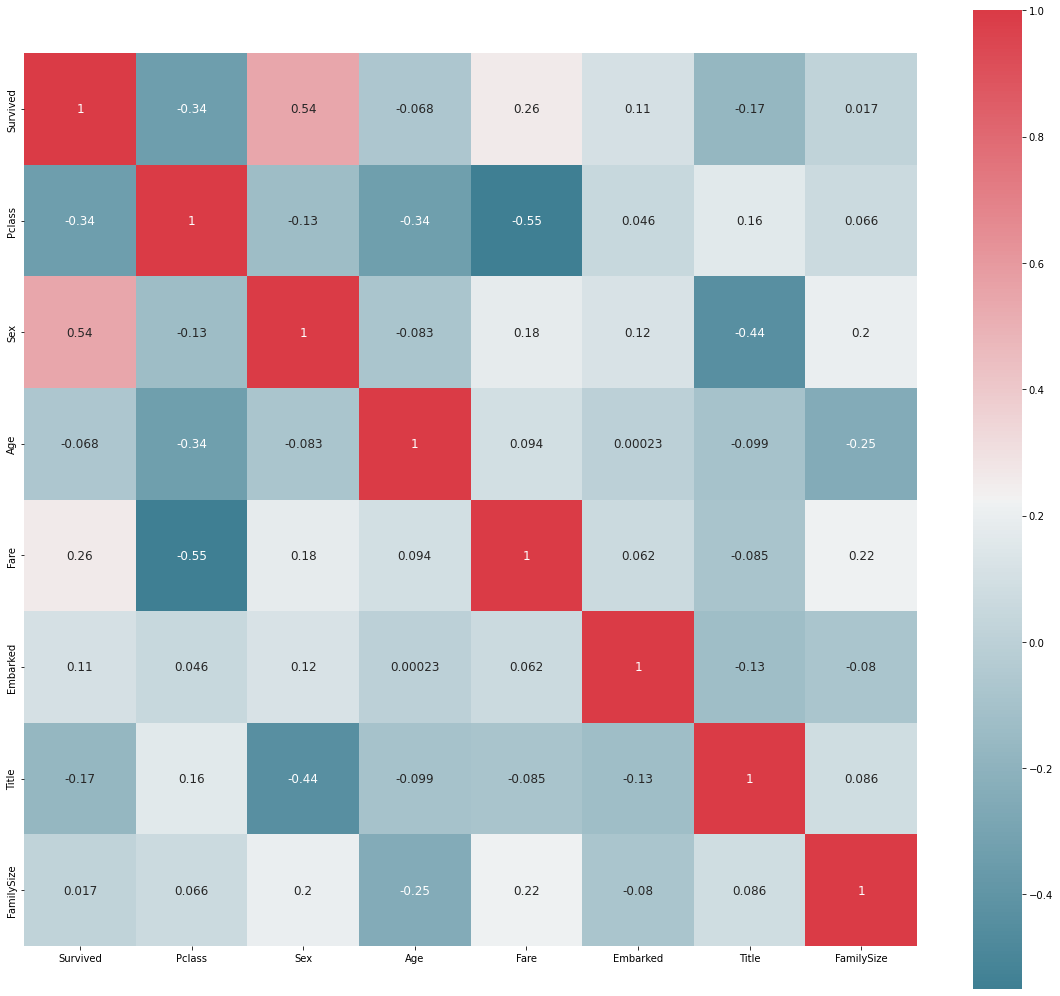

In [4]:
del db['PassengerId']
del db['Ticket']
del db['Cabin']
del db['Name']
del db['SibSp']
del db['Parch']
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_map( db ):

    corr = db.corr()

    s , ax = plt.subplots( figsize =( 20 , 20 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(db)

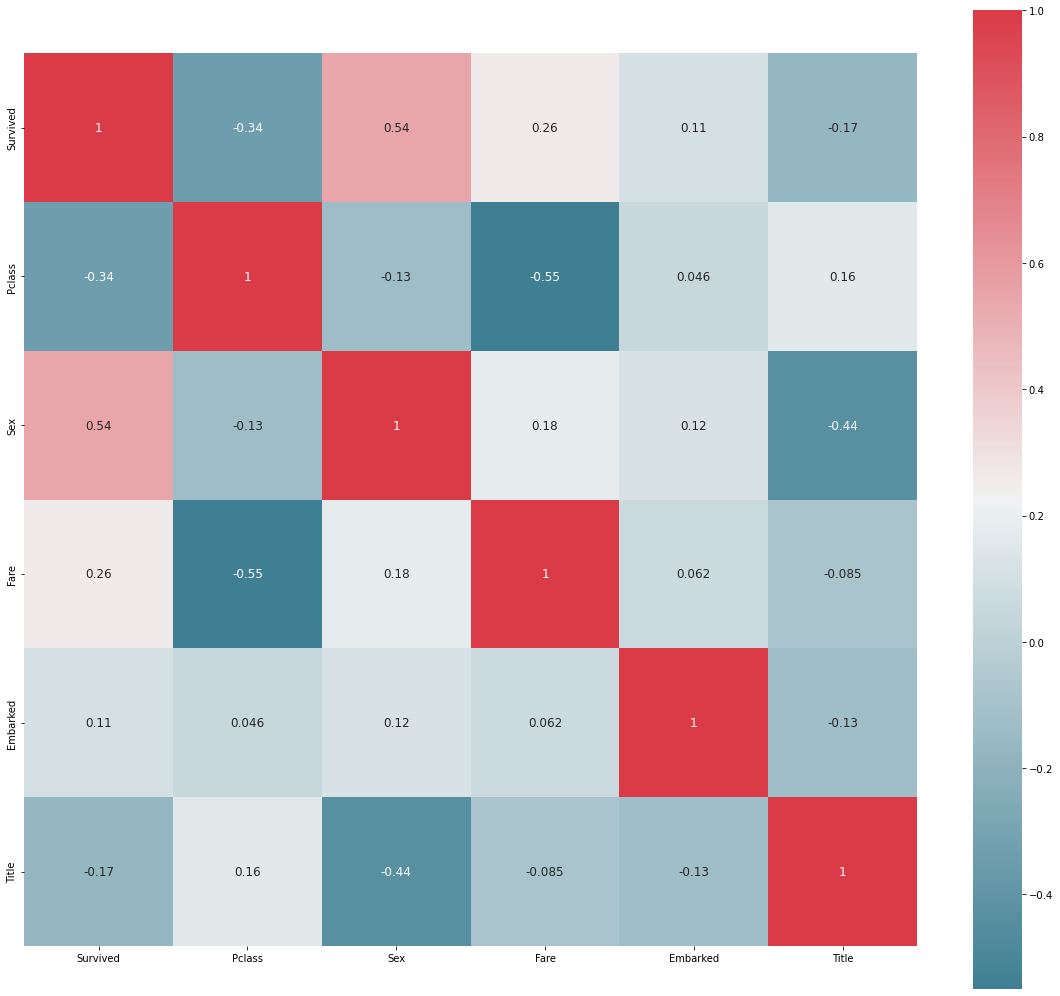

In [5]:
del db['FamilySize']
del db['Age']
plot_correlation_map(db)

In [6]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = db[['Pclass', 'Sex','Fare', 'Embarked','Title']]
y = db['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.82


In [7]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = db[['Pclass', 'Sex','Fare']]
y = db['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.82


In [8]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = db[['Sex']]
y = db['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

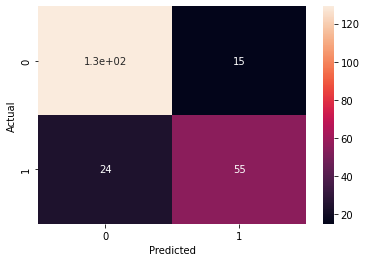

In [9]:
#Question2
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       144
           1       0.79      0.70      0.74        79

    accuracy                           0.83       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.83      0.82       223



In [11]:
'''ROC (Receiver Operating Characteristic) curve is a visualization of false positive rate (x-axis) and the true positive rate (y-axis).
'''

'ROC (Receiver Operating Characteristic) curve is a visualization of false positive rate (x-axis) and the true positive rate (y-axis).\n'

AUC Score: 0.80


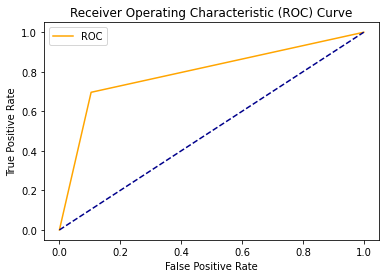

In [16]:
#question3
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,roc_curve
pred_prob = logreg.predict_proba(x_test)
probs = pred_prob[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC Score: %.2f' % auc)


fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()